**SIMULATED ANNEALING ALGORITHM**

**eil76 Dataset (Optimal Solution - 576)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

**Define Coordinate Class**

In [2]:
class Coordinate:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    #Calculate Euclidean distance between two coordinates
    @staticmethod
    def get_distance(a, b):
        return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)
    
    #Compute total distance for a given route
    @staticmethod
    def get_total_distance(coords):
        dist = sum(Coordinate.get_distance(a, b) for a, b in zip(coords[:-1], coords[1:]))
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

**Load Dataset**

In [3]:
coordinates = [
    (22, 22), (36, 26), (21, 45), (45, 35), (55, 20), (33, 34), (50, 50), (55, 45),
    (26, 59), (40, 66), (55, 65), (35, 51), (62, 35), (62, 57), (62, 24), (21, 36),
    (33, 44), (9, 56), (62, 48), (66, 14), (44, 13), (26, 13), (11, 28), (7, 43),
    (17, 64), (41, 46), (55, 34), (35, 16), (52, 26), (43, 26), (31, 76), (22, 53),
    (26, 29), (50, 40), (55, 50), (54, 10), (60, 15), (47, 66), (30, 60), (30, 50),
    (12, 17), (15, 14), (16, 19), (21, 48), (50, 30), (51, 42), (50, 15), (48, 21),
    (12, 38), (15, 56), (29, 39), (54, 38), (55, 57), (67, 41), (10, 70), (6, 25),
    (65, 27), (40, 60), (70, 64), (64, 4), (36, 6), (30, 20), (20, 30), (15, 5),
    (50, 70), (57, 72), (45, 42), (38, 33), (50, 4), (66, 8), (59, 5), (35, 60),
    (27, 24), (40, 20), (40, 37), (40, 40)
]


**Simulated Annealing Algorithm**

In [4]:
#SA params: 
# T0 = initial temperature
# r = cooling rate 
# max_iterations = max number of iterations

def Simulated(T0=40000, r=0.80, max_iterations=1000):

    #Turns dataset into Coordinate objects
    coords = [Coordinate(x, y) for x, y in coordinates]

    best_route = coords[:]
    best_distance = Coordinate.get_total_distance(coords)

    start_time = time.time()
    T = T0

    for _ in range(max_iterations):
        L = np.random.randint(10, 31)
        for _ in range(L):
            r1, r2 = np.random.randint(0, len(coords), size=2) 
            coords[r1], coords[r2] = coords[r2], coords[r1]

            current_distance = Coordinate.get_total_distance(coords) #swap cities

            #Acceptance probability
            if current_distance < best_distance or np.random.uniform() < np.exp((best_distance - current_distance) / T):
                best_distance = current_distance
                best_route = coords[:]
            else:
                coords[r1], coords[r2] = coords[r2], coords[r1] #revert swap

        T *= r
    
    best_route.append(best_route[0])

    end_time = time.time()
    cpu_time = end_time - start_time

    best_tour_indices = [coordinates.index((c.x, c.y)) for c in best_route]

    print(f"Best Tour: {best_tour_indices}")
    print(f"Best Length: {best_distance:.2f}")
    print(f"CPU Time: {cpu_time:.4f} seconds")

    fig, ax = plt.subplots(figsize=(10, 6))

    for first, second in zip(best_route[:-1], best_route[1:]):
        ax.plot([first.x, second.x], [first.y, second.y], 'b')
    ax.plot([best_route[0].x, best_route[-1].x], [best_route[0].y, best_route[-1].y], 'b')

    for i, c in enumerate(best_route):
        ax.plot(c.x, c.y, 'ro')
        ax.text(c.x + 1, c.y + 1, f'{i}', color='black', fontsize=8)

    ax.set_title('Simulated Annealing for Symmetric TSP')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    plt.show()


Implementations

1st

Best Tour: [42, 41, 40, 55, 22, 39, 11, 52, 13, 58, 18, 7, 34, 6, 66, 3, 21, 63, 60, 27, 29, 44, 28, 4, 35, 68, 46, 25, 8, 38, 71, 57, 45, 51, 26, 14, 36, 70, 59, 69, 19, 56, 12, 53, 30, 24, 54, 17, 49, 31, 50, 5, 1, 61, 72, 32, 62, 48, 23, 9, 37, 64, 65, 10, 33, 47, 20, 73, 67, 74, 75, 16, 43, 2, 15, 0, 42]
Best Length: 838.40
CPU Time: 2.7559 seconds


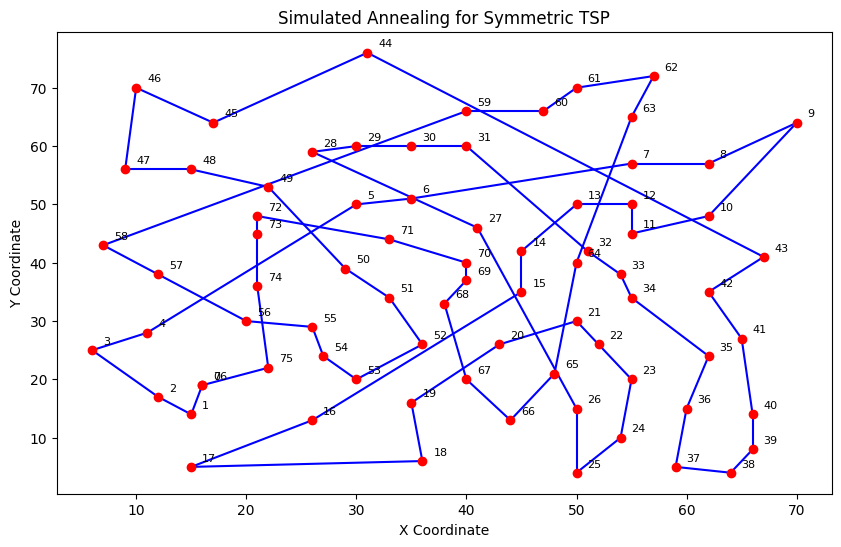

In [5]:
Simulated()

2nd

Best Tour: [25, 11, 57, 9, 37, 64, 65, 30, 54, 24, 49, 8, 39, 50, 32, 21, 63, 41, 40, 38, 71, 10, 52, 13, 58, 53, 36, 35, 68, 60, 61, 1, 67, 66, 6, 34, 18, 7, 0, 42, 55, 22, 15, 2, 43, 31, 16, 74, 28, 4, 26, 51, 45, 33, 73, 27, 20, 47, 14, 12, 56, 19, 69, 59, 70, 46, 5, 17, 23, 48, 62, 72, 29, 44, 3, 75, 25]
Best Length: 876.58
CPU Time: 3.5854 seconds


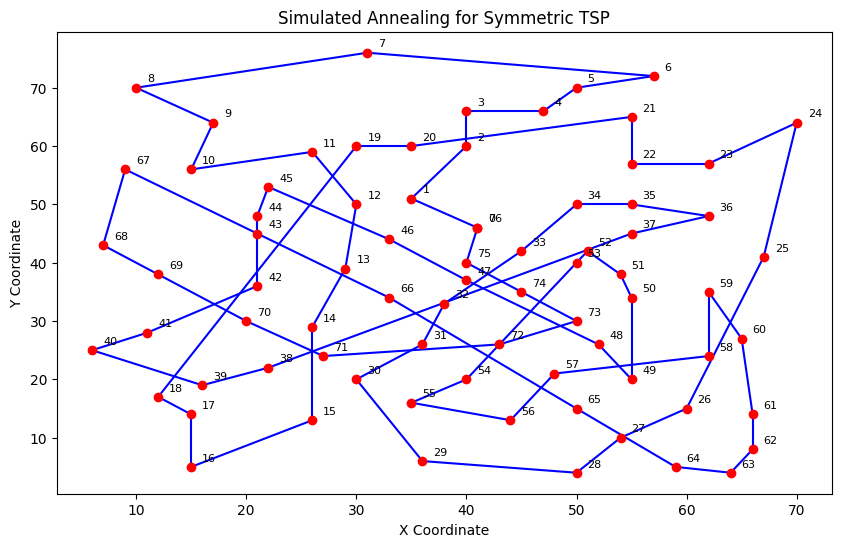

In [6]:
Simulated()

3rd

Best Tour: [29, 73, 20, 68, 35, 36, 14, 56, 12, 37, 30, 9, 57, 6, 7, 45, 33, 75, 16, 2, 43, 49, 54, 24, 11, 25, 51, 26, 53, 18, 58, 13, 34, 67, 5, 27, 61, 32, 62, 15, 48, 17, 23, 55, 40, 22, 31, 8, 38, 71, 39, 50, 60, 70, 59, 69, 19, 4, 64, 65, 10, 52, 66, 74, 21, 63, 41, 42, 0, 72, 1, 47, 46, 28, 44, 3, 29]
Best Length: 873.39
CPU Time: 3.5651 seconds


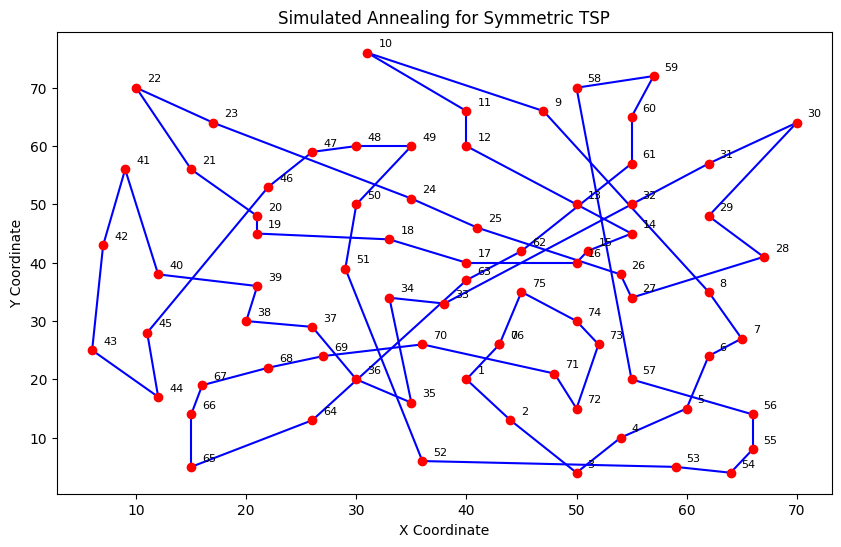

In [7]:
Simulated()

4th

Best Tour: [33, 51, 26, 14, 36, 19, 56, 57, 37, 10, 52, 13, 58, 18, 34, 7, 53, 12, 28, 0, 42, 55, 22, 9, 64, 65, 30, 54, 24, 8, 69, 59, 70, 60, 63, 40, 41, 21, 61, 27, 47, 4, 46, 35, 68, 20, 50, 31, 43, 2, 62, 32, 72, 73, 29, 44, 3, 15, 48, 23, 17, 49, 75, 74, 67, 1, 5, 16, 39, 38, 71, 11, 25, 66, 6, 45, 33]
Best Length: 900.35
CPU Time: 3.3288 seconds


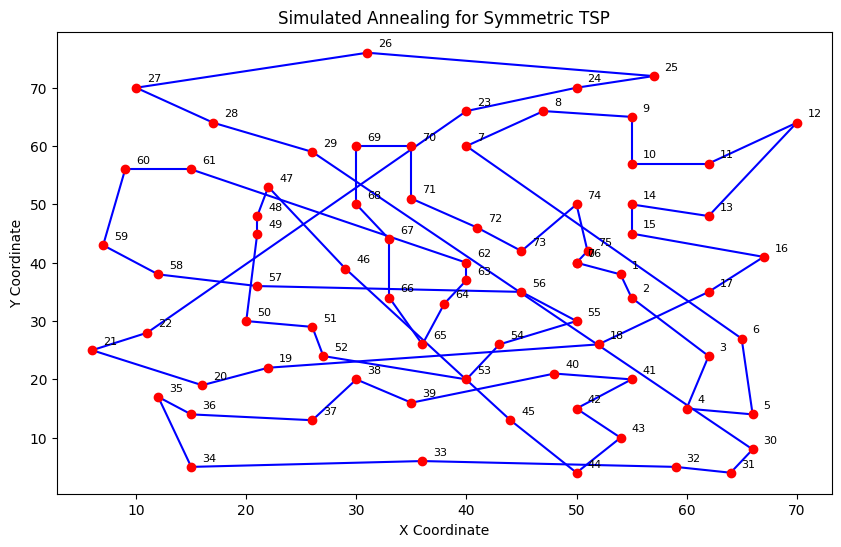

In [8]:
Simulated()

5th

Best Tour: [29, 44, 28, 69, 19, 59, 70, 46, 20, 32, 15, 62, 0, 35, 68, 60, 63, 41, 42, 16, 11, 57, 52, 13, 10, 64, 37, 9, 71, 39, 22, 55, 40, 21, 27, 73, 26, 12, 53, 58, 65, 30, 31, 43, 50, 5, 47, 4, 36, 14, 56, 51, 33, 3, 66, 45, 7, 18, 34, 6, 2, 48, 23, 17, 49, 54, 24, 8, 38, 25, 75, 74, 67, 72, 61, 1, 29]
Best Length: 840.70
CPU Time: 1.9729 seconds


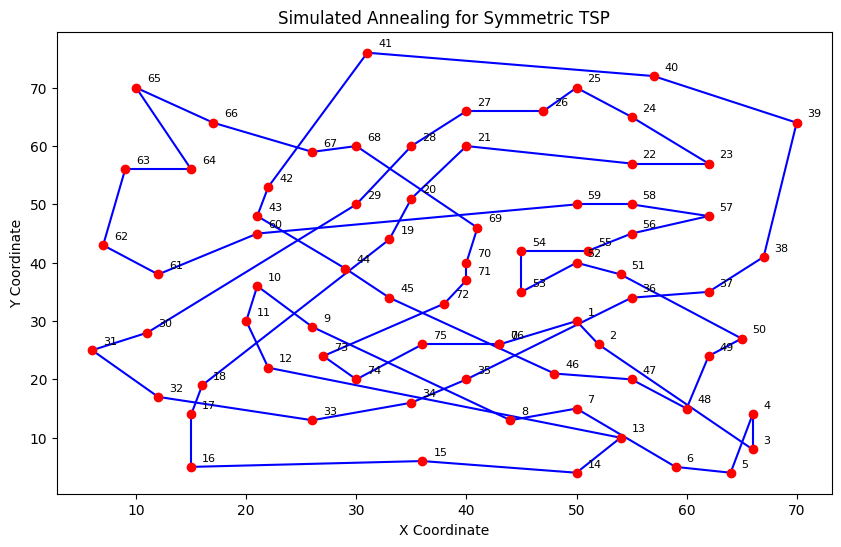

In [9]:
Simulated()

6th

Best Tour: [4, 46, 47, 29, 3, 6, 34, 7, 45, 33, 66, 74, 75, 11, 31, 43, 2, 15, 48, 23, 17, 54, 24, 30, 57, 25, 67, 1, 61, 21, 55, 22, 62, 39, 16, 50, 5, 32, 72, 0, 42, 40, 41, 63, 60, 68, 35, 36, 14, 26, 51, 53, 18, 13, 52, 10, 58, 65, 64, 37, 9, 71, 38, 8, 49, 27, 73, 20, 70, 59, 69, 19, 56, 12, 44, 28, 4]
Best Length: 722.10
CPU Time: 1.9920 seconds


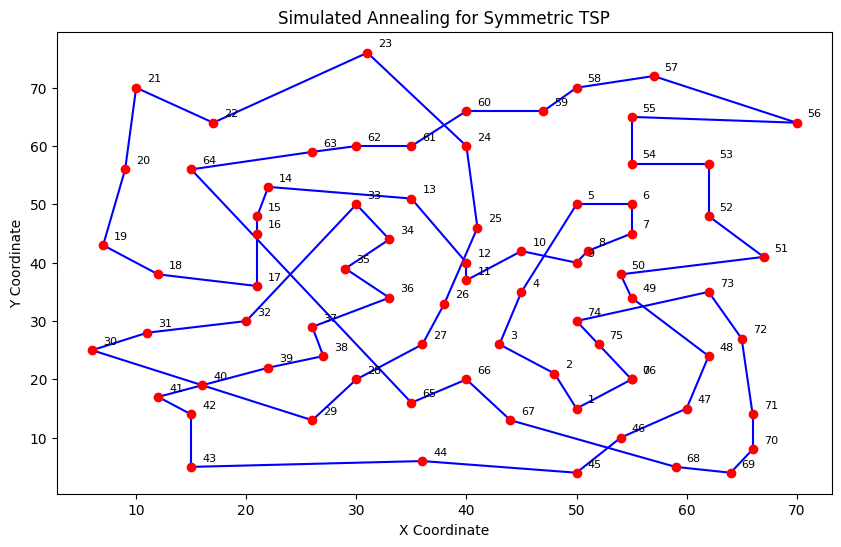

In [10]:
Simulated()

7th

Best Tour: [15, 62, 0, 42, 41, 63, 40, 39, 71, 9, 30, 54, 17, 49, 24, 8, 38, 11, 25, 66, 6, 52, 58, 13, 34, 18, 53, 28, 44, 67, 5, 72, 61, 27, 73, 47, 29, 75, 16, 2, 23, 48, 55, 22, 50, 74, 3, 26, 51, 33, 45, 7, 12, 56, 14, 36, 19, 69, 59, 70, 60, 21, 43, 31, 57, 37, 64, 65, 10, 4, 35, 68, 46, 20, 1, 32, 15]
Best Length: 797.46
CPU Time: 3.4913 seconds


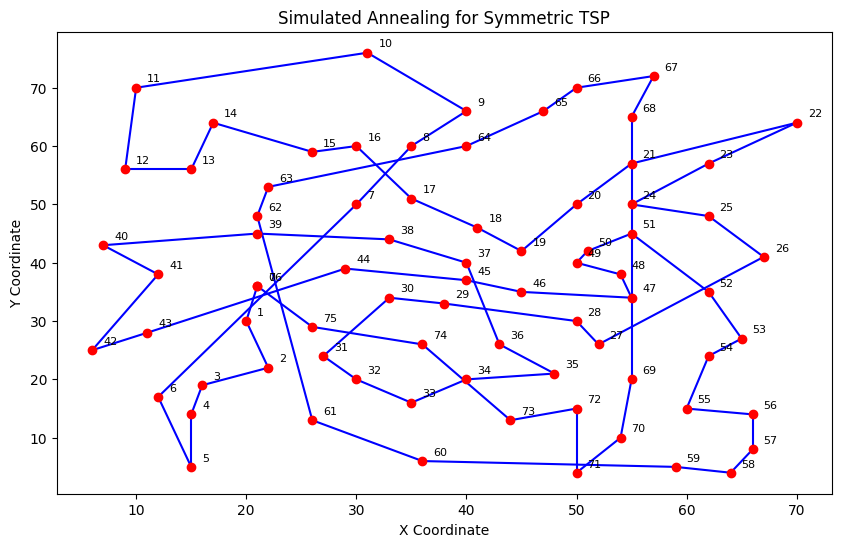

In [11]:
Simulated()

8th

Best Tour: [63, 55, 22, 40, 41, 42, 0, 62, 32, 72, 61, 20, 68, 70, 59, 69, 35, 46, 73, 67, 74, 7, 34, 6, 66, 75, 5, 15, 48, 23, 17, 49, 44, 28, 4, 36, 19, 56, 14, 47, 29, 25, 37, 64, 8, 31, 43, 2, 50, 16, 39, 11, 57, 9, 71, 38, 24, 54, 30, 52, 13, 10, 65, 58, 18, 53, 12, 26, 51, 45, 33, 3, 1, 27, 60, 21, 63]
Best Length: 755.90
CPU Time: 2.7580 seconds


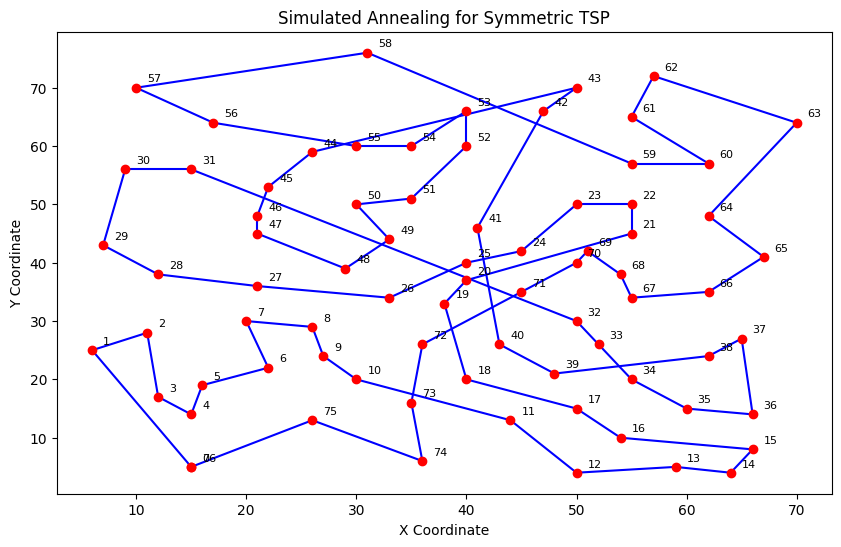

In [12]:
Simulated()

9th

Best Tour: [28, 44, 66, 25, 16, 75, 74, 3, 67, 32, 62, 0, 72, 20, 68, 60, 21, 63, 41, 2, 43, 23, 48, 55, 40, 42, 22, 15, 50, 5, 1, 61, 27, 73, 29, 57, 37, 64, 65, 58, 53, 12, 56, 14, 19, 36, 4, 33, 45, 6, 11, 39, 8, 24, 54, 17, 49, 31, 38, 71, 30, 9, 10, 52, 47, 46, 35, 70, 59, 69, 18, 13, 34, 7, 51, 26, 28]
Best Length: 792.54
CPU Time: 4.0919 seconds


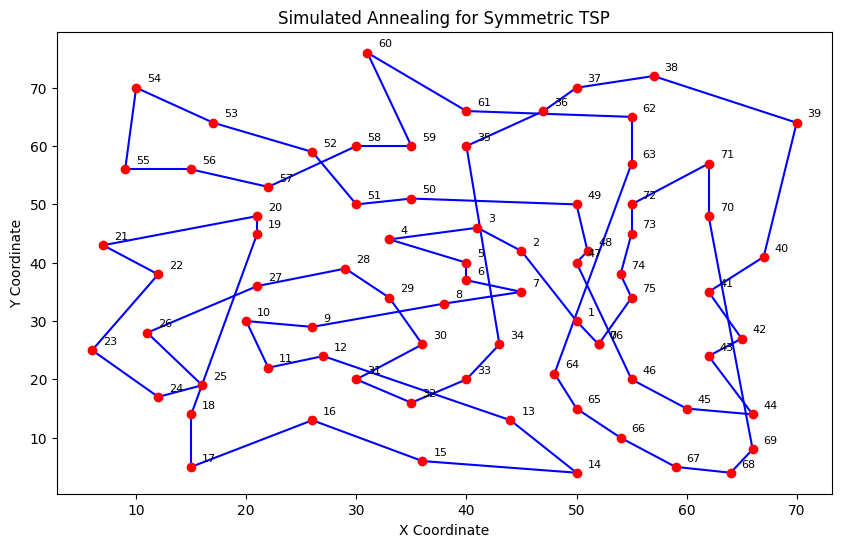

In [13]:
Simulated()

10th

Best Tour: [35, 68, 60, 63, 40, 55, 22, 23, 17, 54, 24, 30, 9, 64, 65, 37, 57, 67, 1, 0, 42, 41, 21, 27, 20, 47, 29, 3, 66, 25, 6, 52, 34, 45, 33, 5, 50, 15, 62, 48, 2, 43, 49, 31, 39, 16, 74, 75, 11, 8, 38, 71, 19, 69, 59, 70, 36, 4, 14, 56, 53, 12, 26, 44, 73, 61, 72, 32, 10, 58, 13, 18, 7, 51, 28, 46, 35]
Best Length: 797.85
CPU Time: 2.4697 seconds


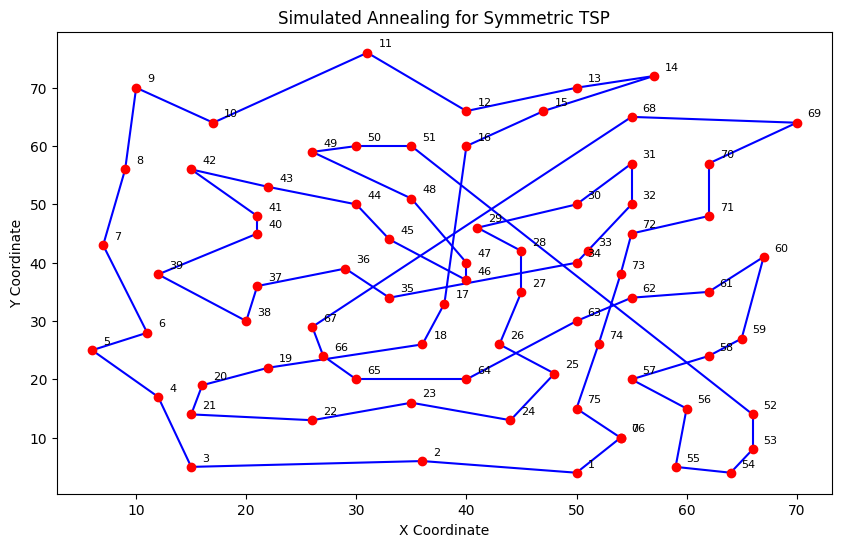

In [14]:
Simulated()